In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

gdp = pd.read_csv('WorldBank_per_capita_GDP.csv', sep="\t")
ec_index = pd.read_csv('heritage-all-data.csv')

In [ ]:
gdp.columns =['Country', 'Year', 'Value', 'dunno']

In [ ]:
gdp = gdp[(gdp.Value.str.contains("NaN")) == False]

In [ ]:
ec_index.dtypes

Name                       object
Index Year                  int64
Overall Score             float64
Property Rights           float64
Government Integrity      float64
Judicial Effectiveness    float64
Tax Burden                float64
Government Spending       float64
Fiscal Health             float64
Business Freedom          float64
Labor Freedom             float64
Monetary Freedom          float64
Trade Freedom             float64
Investment Freedom        float64
Financial Freedom         float64
dtype: object

In [ ]:
ec_index = ec_index[['Name', 'Index Year', 'Overall Score']]
gdp = gdp[['Country', 'Value']]

In [ ]:
gdp['Value'] = gdp['Value'].str.replace(',','').astype(np.float64)

In [ ]:
gdp.dtypes

Country     object
Value      float64
dtype: object

In [ ]:
gdp

,Country,Value
0,Afghanistan,2152.4
1,Albania,14013.0
2,Algeria,12009.2
5,Angola,6952.4
6,Antigua and Barbuda,22774.2
...,...,...
243,Low & middle income,11048.2
244,Low income,2066.7
245,Lower middle income,7416.1
246,Middle income,12059.4


In [ ]:
ec_index.columns = ['Country', 'Year', 'Score']

In [ ]:
ec_index.dtypes

Country     object
Year         int64
Score      float64
dtype: object

In [ ]:
print (ec_index)

         Country  Year  Score
0    Afghanistan  2019   51.5
1        Albania  2019   66.5
2        Algeria  2019   46.2
3         Angola  2019   50.6
4      Argentina  2019   52.2
..           ...   ...    ...
181    Venezuela  2019   25.9
182      Vietnam  2019   55.3
183        Yemen  2019    NaN
184       Zambia  2019   53.6
185     Zimbabwe  2019   40.4

[186 rows x 3 columns]


In [ ]:
ec_index[ec_index['Year'].isin(ec_index.filter(like='2019').stack())]

,Country,Year,Score


In [ ]:
print (ec_index)

         Country  Year  Score
0    Afghanistan  2019   51.5
1        Albania  2019   66.5
2        Algeria  2019   46.2
3         Angola  2019   50.6
4      Argentina  2019   52.2
..           ...   ...    ...
181    Venezuela  2019   25.9
182      Vietnam  2019   55.3
183        Yemen  2019    NaN
184       Zambia  2019   53.6
185     Zimbabwe  2019   40.4

[186 rows x 3 columns]


In [ ]:
merged_data = pd.merge(gdp, ec_index, on='Country')

In [ ]:
merged_data

,Country,Value,Year,Score
0,Afghanistan,2152.4,2019,51.5
1,Albania,14013.0,2019,66.5
2,Algeria,12009.2,2019,46.2
3,Angola,6952.4,2019,50.6
4,Argentina,22999.3,2019,52.2
...,...,...,...,...
157,Uzbekistan,7658.9,2019,53.3
158,Vanuatu,3269.9,2019,56.4
159,Vietnam,8381.2,2019,55.3
160,Zambia,3617.2,2019,53.6


In [ ]:
merged_data = merged_data[['Country', 'Value', 'Score']]

In [ ]:
merged_data

,Country,Value,Score
0,Afghanistan,2152.4,51.5
1,Albania,14013.0,66.5
2,Algeria,12009.2,46.2
3,Angola,6952.4,50.6
4,Argentina,22999.3,52.2
...,...,...,...
157,Uzbekistan,7658.9,53.3
158,Vanuatu,3269.9,56.4
159,Vietnam,8381.2,55.3
160,Zambia,3617.2,53.6


In [ ]:
merged_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

C:\Users\Melo\AppData\Local\Temp\ipykernel_10440\4160153751.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_data

,Country,Value,Score
0,Afghanistan,2152.4,51.5
1,Albania,14013.0,66.5
2,Algeria,12009.2,46.2
3,Angola,6952.4,50.6
4,Argentina,22999.3,52.2
...,...,...,...
157,Uzbekistan,7658.9,53.3
158,Vanuatu,3269.9,56.4
159,Vietnam,8381.2,55.3
160,Zambia,3617.2,53.6


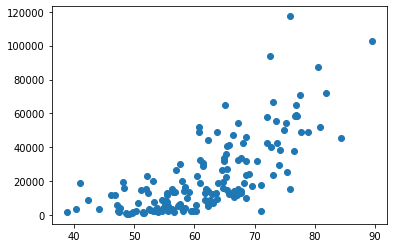

In [ ]:
plt.scatter(merged_data.Score, merged_data.Value)

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
fig = px.scatter(merged_data, x="Score", y="Value", log_x=True, hover_data=["Country", "Score"])
fig.show()

In [ ]:
fig = px.scatter(merged_data, x="Score", y="Value", trendline="ols", log_x=True, hover_data=["Country", "Score"])
fig.show()